# Assessing loan eligibility of customers

## Steps

* Introduction
* Descriptive data analysis
* Visualising categorical variables affecting loan eligibilty
* Visualising numerical variables affecting loan eligibility
* Correlation between numerical variables
* Loan eligibility/ credit score prediction models
* Insights


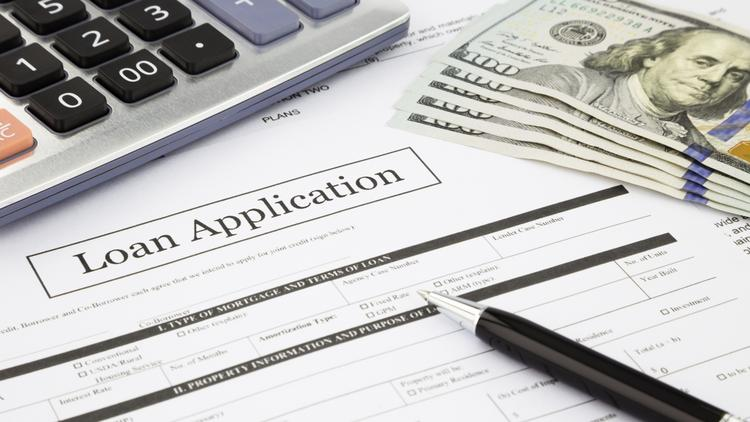

## Introduction

**Scenario:** Banks primarily focus on loans as the central aspect of their operations, deriving significant profit from the interest generated by loans. The approval of a loan involves a thorough verification and validation process by loan companies. Despite these measures, there remains uncertainty regarding the applicant's ability to repay the loan without encountering challenges. In this context, the following Python code introduces a comprehensive analysis for evaluating loan eligibility.

**Research Questions:** To develop a model that predicts the creditworthiness of a customer.

* What specific factors significantly influence the creditworthiness of customers in the lending industry?
* To what extent does demographic information exhibit bias in determining creditworthiness, and what demographic variables are particularly influential?
* Can machine learning models effectively predict the creditworthiness of individuals, and what key features contribute most to accurate predictions in credit assessment?

**Data Set:** The dataset was obtained from Kaggle. https://www.kaggle.com/datasets/mohammedobeidat/credit-score-classification

* dataset.csv

| Field |	Description |
|:--------|:--------|
| ID| An identifier for each record in the dataset, typically a unique number or code. |
| Customer_ID| An identifier for each customer, which can be used to link multiple records for the same customer. |
| Month| The month or time period to which the data corresponds. It may indicate when the data was collected or when the credit scoring assessment was made. |
| Name| The name of the customer or borrower. |
| Age| The age of the customer, which can be a factor in credit scoring. |
| SSN| The Social Security Number or a unique identification number for the customer, often used for verification purposes. |
| Occupation| The customer's occupation or employment status, which can provide insight into their financial stability. |
| Annual_Income| The customer's total annual income, a key factor in determining creditworthiness. |
| Monthly_Inhand_Salary| The customer's monthly take-home salary after deductions. |
| Num_Bank_Accounts| The number of bank accounts held by the customer, which may indicate financial stability. |
| Num_Credit_Card| The number of credit cards owned by the customer. |
| Interest_Rate| The interest rate associated with a loan or credit, if applicable. |
| Num_of_Loan| The number of loans currently held by the customer. |
| Type_of_Loan| The type or category of the loan(s), such as personal loan, mortgage, or car loan. |
| Delay_from_due_date| The delay in making payments from the due date, which may indicate a history of late payments. |
| Num_of_Delayed_Payment| The number of delayed or missed payments. |
| Changed_Credit_Limit| Whether there has been a change in the customer's credit limit. |
| Num_Credit_Inquiries| The number of times the customer's credit report has been accessed by creditors or lenders. |
| Credit_Mix| The variety of credit types used by the customer, such as credit cards, loans, and mortgages. |
| Outstanding_Debt| The total amount of outstanding debt owed by the customer. |
| Credit_Utilization_Ratio| The ratio of credit used to credit available, often associated with credit cards. |
| Credit_History_Age| The length of the customer's credit history, which can impact credit scores. |
| Payment_of_Min_Amount| Whether the customer has consistently made at least the minimum required payments on loans or credit cards. |
| Total_EMI_per_month| The total Equated Monthly Installments (EMI) paid by the customer. |
| Amount_invested_monthly| The amount the customer invests or saves monthly. |
| Payment_Behaviour| An indicator of the customer's payment behavior, such as "good," "fair," or "poor." |
| Monthly_Balance| The customer's monthly account balance or financial position. |
| Credit_Score| The credit score assigned to the customer based on various factors and calculations, which is often used to assess creditworthiness. |

### Import libraries

In [112]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from pywaffle import Waffle
from scipy.stats import zscore
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.neighbors import KNeighborsClassifier as KNN

from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# avoiding display of truncated columns 
pd.options.display.max_columns = 140
pd.options.display.max_colwidth = 50

## Descriptive data analysis

### Load the data

In [5]:
customer_data = pd.read_csv('dataset.csv')

### Data types

In [6]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [11]:
customer_data.head(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good


*Notes:* 
* Data looks clean. no null values.



### Summary statistics

In [7]:
customer_data.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [8]:
customer_data.describe(include='object')

,Name,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
count,100000,100000,100000,100000,100000,100000,100000
unique,10128,15,6261,3,3,6,3
top,Jessicad,Lawyer,No Data,Standard,Yes,Low_spent_Small_value_payments,Standard
freq,48,7096,11408,45848,52326,28580,53174


*Notes:*
* *`Annual_Income`, `Monthly_Inhand_Salary`, `Outstanding_Debt`, `Total_EMI_per_month`, `Amount_invested_monthly`,	`Monthly_Balance` and `Interest_Rates`) are positively skewed. (Mean > Median)*
* *`Number_of_delayed_payments` is negatively skewed.*
* *Customers with `Standard` credit score are the majority*
* *Variable `Type_of_Loan` needs feature engineering - looks like there are about 6261 unique combinations of loan types and there are 11408 without any loan or no data*

In [12]:
#A function to get unique values from object type columns

def get_unique_values(dataframe):
    unique_values_dict = {}

    # Iterate through each column
    for column in dataframe.columns:
        # Check if the column has object type
        if dataframe[column].dtype == 'O':
            # Get unique values for the object-type column
            unique_values = dataframe[column].unique()
            unique_values_dict[column] = unique_values

    return unique_values_dict

In [13]:
unique_values_customer_history = get_unique_values(customer_data)

# Print the unique values for each object-type column
for column, unique_values in unique_values_customer_history.items():
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'Name': ['Aaron Maashoh' 'Rick Rothackerj' 'Langep' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks']
Unique values in 'Occupation': ['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']
Unique values in 'Type_of_Loan': ['auto loan,credit-builder loan,personal loan,home equity loan'
 'credit-builder loan' 'auto loan,auto loan,not specified' ...
 'home equity loan,auto loan,auto loan,auto loan'
 'payday loan,student loan,mortgage loan,not specified'
 'personal loan,auto loan,mortgage loan,student loan,student loan']
Unique values in 'Credit_Mix': ['Good' 'Standard' 'Bad']
Unique values in 'Payment_of_Min_Amount': ['No' 'NM' 'Yes']
Unique values in 'Payment_Behaviour': ['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' 'High_spent_La

### Feature engineering

##### Type of loan
*The `Type_of_Loan` has multiple combinations of different loan types creating 6241 unique combinations. Therefore, we need to identify unique loan types and add them as different variables and add binary indicators to show if each loan type applies to the individaul or not*

In [14]:
def manipulate_factors(dataframe, variable):
    
    # Split the strings and create a set of unique items
    unique_items = set()
    
    for item_list in dataframe[variable]:
        items = item_list.split(',')
        unique_items.update(items)

    # Create a dictionary to hold binary indicators for each item
    indicators = {}
    for item in unique_items:
        indicators[item] = dataframe[variable].apply(lambda x: item in x).astype(int)

    # Create a new DataFrame with binary indicators
    result_dataframe = pd.DataFrame(indicators)
    
    return result_dataframe

In [15]:
type_loan = manipulate_factors(customer_data,'Type_of_Loan')

In [16]:
type_loan.head(5)

,student loan,auto loan,credit-builder loan,mortgage loan,No Data,home equity loan,payday loan,debt consolidation loan,personal loan,not specified
0,0,1,1,0,0,1,0,0,1,0
1,0,1,1,0,0,1,0,0,1,0
2,0,1,1,0,0,1,0,0,1,0
3,0,1,1,0,0,1,0,0,1,0
4,0,1,1,0,0,1,0,0,1,0


In [17]:
updated_data = pd.concat([customer_data, type_loan], axis=1).drop('Type_of_Loan', axis=1)
updated_data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,student loan,auto loan,credit-builder loan,mortgage loan,No Data,home equity loan,payday loan,debt consolidation loan,personal loan,not specified
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good,0,1,1,0,0,1,0,0,1,0
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good,0,1,1,0,0,1,0,0,1,0
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good,0,1,1,0,0,1,0,0,1,0
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good,0,1,1,0,0,1,0,0,1,0
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good,0,1,1,0,0,1,0,0,1,0


##### Examine 'No Data' and 'not specified'

In [29]:
def count_rows_with_value(dataframe, binary_variable):
    count = (dataframe[binary_variable] == 1).sum()
    return count

In [30]:
binary_variable_name = 'No Data'

count_ones = count_rows_with_value(updated_data, binary_variable_name)
print(f"The number of rows with '1' in the '{binary_variable_name}' variable is: {count_ones}")

The number of rows with '1' in the 'No Data' variable is: 11408


In [31]:
binary_variable_name = 'not specified'

count_ones = count_rows_with_value(updated_data, binary_variable_name)
print(f"The number of rows with '1' in the '{binary_variable_name}' variable is: {count_ones}")

The number of rows with '1' in the 'not specified' variable is: 31680


In the first instance I have decided to go ahead with individuals with 'no data' and 'not specified' loan types, to see if they have a predictive value. Given the number of instances with 'no data' or 'not specified' it is ~10% - 31% it may be too much to remove or in reality it may occur.

## Visualising categorical variables affecting loan eligibilty

In [44]:
def create_stacked_bar_plots(data, variable_names):

    # Setting a color palette
    sns.set_palette("colorblind")

    # Loop through each variable and create a stacked bar plot
    for variable in variable_names:
        plt.figure(figsize=(10, 6))
        pd.crosstab(data[variable], data['Credit_Score']).plot(kind='bar', stacked=True, color=sns.color_palette("colorblind"), edgecolor='white')

        # Generate title based on the variable name
        title = f'Stacked Bar Plot for Count of Individuals by {variable.capitalize()} and Creditworthiness'

        plt.title(title)
        plt.xlabel(variable.capitalize())  # Capitalize the variable name in the x-axis label
        plt.ylabel('Count of Individuals')
        plt.legend(title='Creditworthiness', loc='upper right')
    plt.show()

<Figure size 1000x600 with 0 Axes>

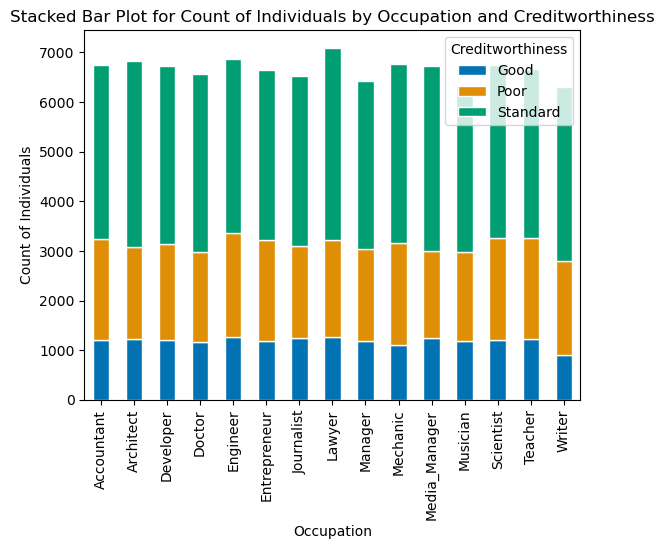

<Figure size 1000x600 with 0 Axes>

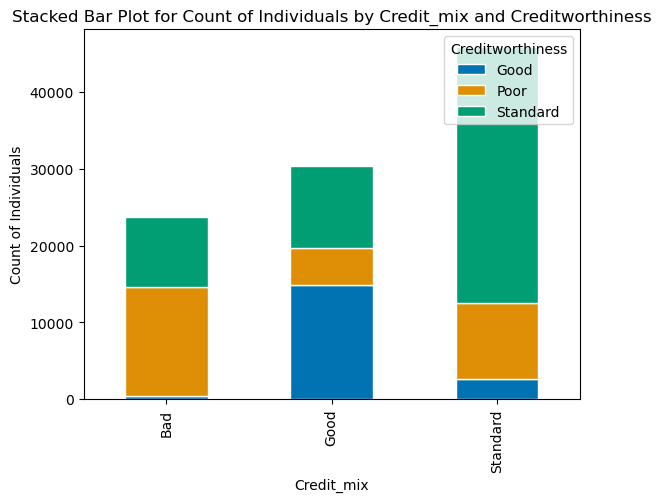

<Figure size 1000x600 with 0 Axes>

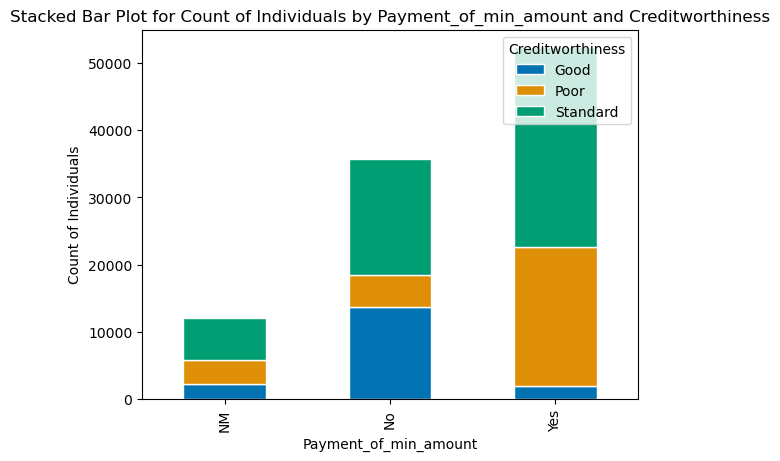

<Figure size 1000x600 with 0 Axes>

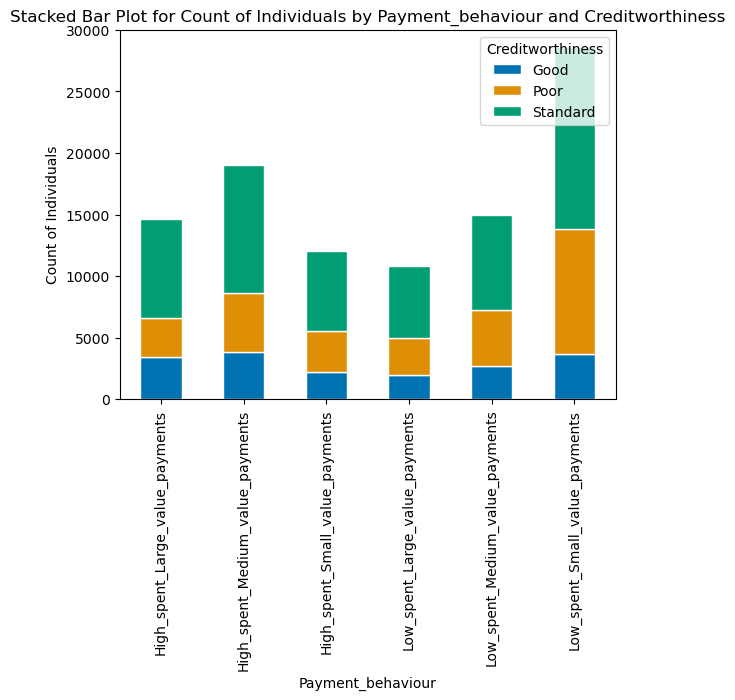

<Figure size 1000x600 with 0 Axes>

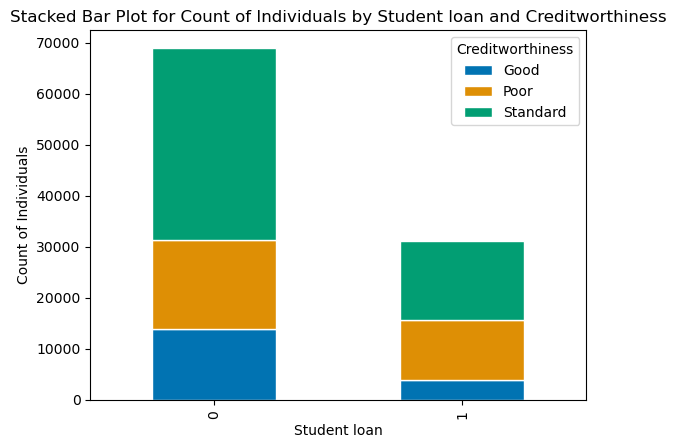

<Figure size 1000x600 with 0 Axes>

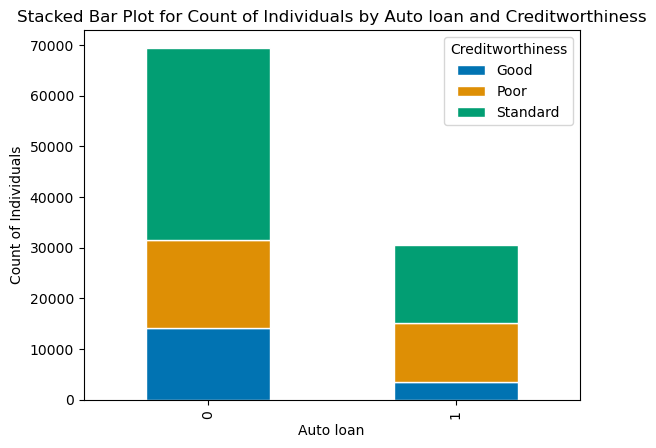

<Figure size 1000x600 with 0 Axes>

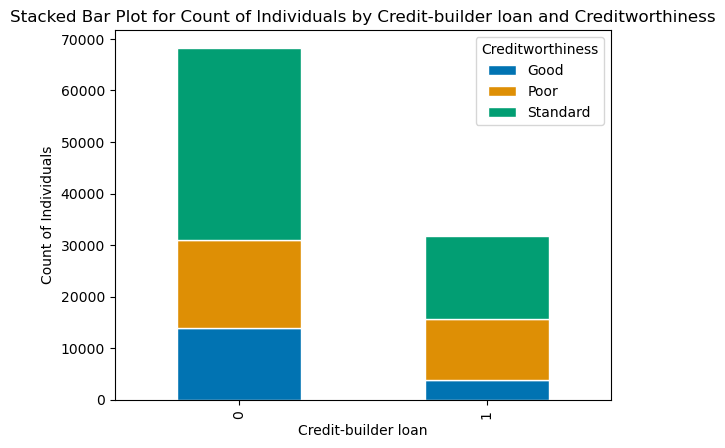

<Figure size 1000x600 with 0 Axes>

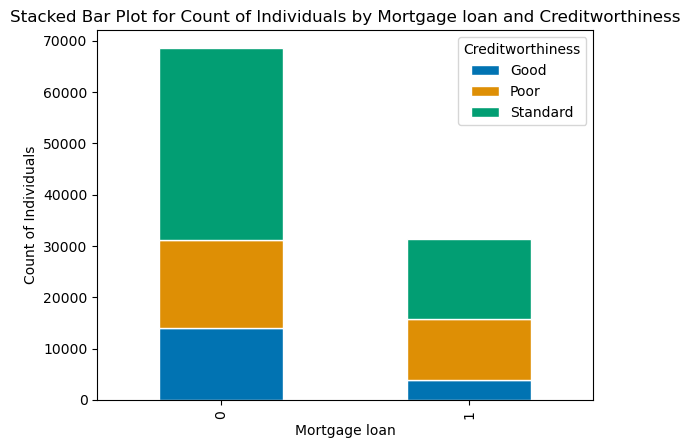

<Figure size 1000x600 with 0 Axes>

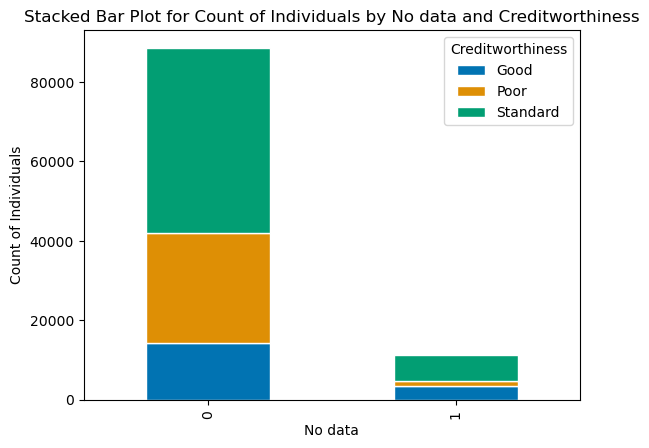

<Figure size 1000x600 with 0 Axes>

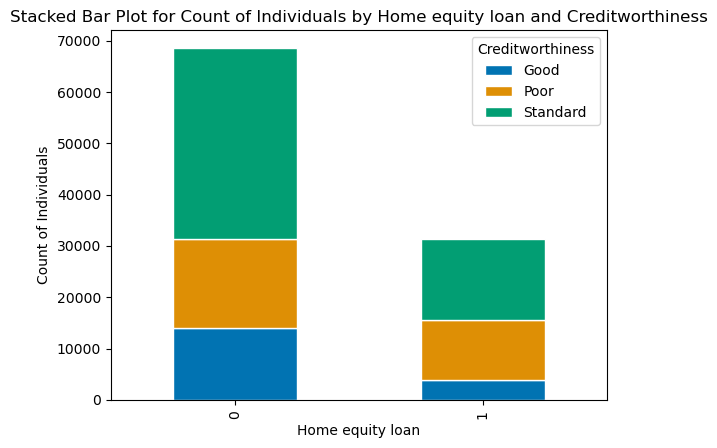

<Figure size 1000x600 with 0 Axes>

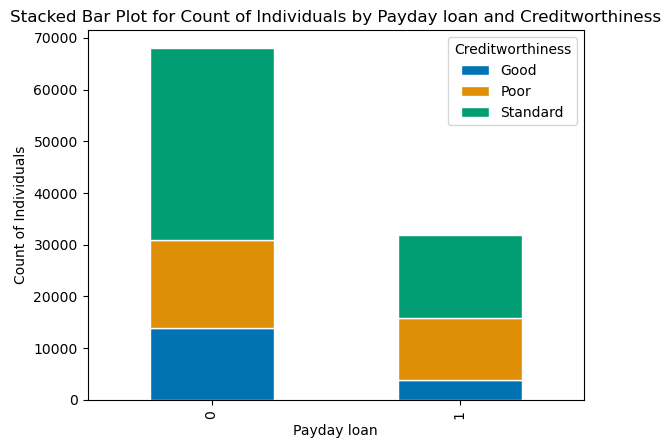

<Figure size 1000x600 with 0 Axes>

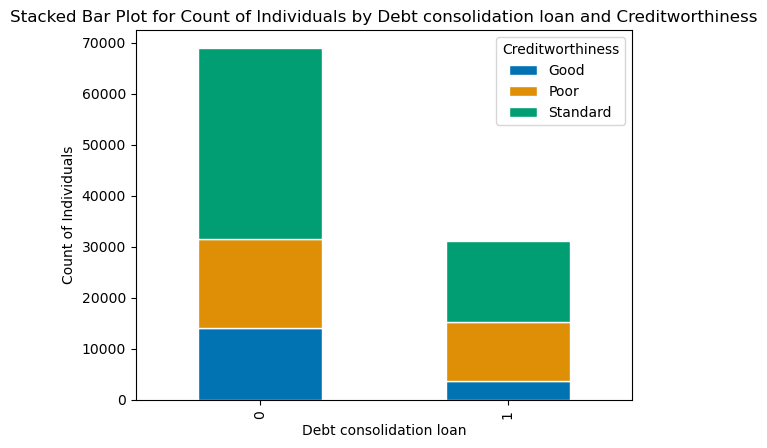

<Figure size 1000x600 with 0 Axes>

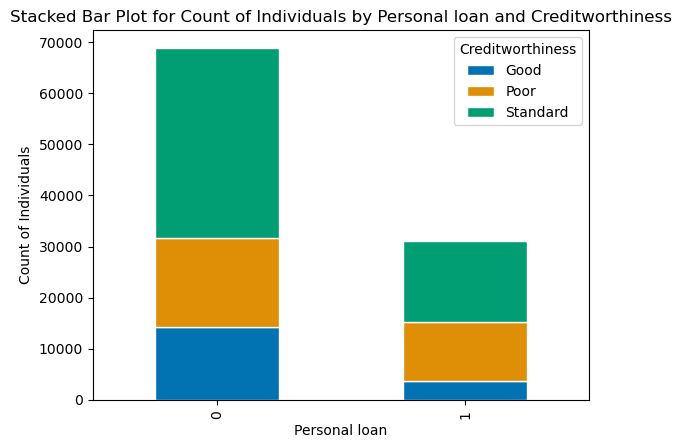

<Figure size 1000x600 with 0 Axes>

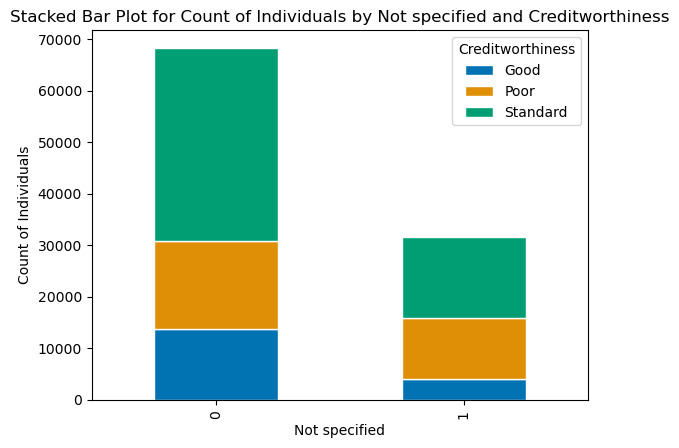

In [47]:
variable_names_list = ['Occupation','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour','student loan','auto loan','credit-builder loan','mortgage loan','No Data','home equity loan','payday loan','debt consolidation loan','personal loan','not specified']

create_stacked_bar_plots(updated_data, variable_names_list)

## Visualising Numerical data affecting loan eligibility

In [50]:
def plot_multiple_histograms(data, numerical_variables):
    sns.set_style('whitegrid')
    
    
    # Set up the number of rows in the subplots grid based on the number of variables
    num_variables = len(numerical_variables)
    num_rows = num_variables // 2 + num_variables % 2
    
    # Create subplots
    fig, ax = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))
    ax = ax.flatten()
    
    # Loop through each numerical variable and create a histogram
    for i, variable in enumerate(numerical_variables):
        sns.histplot(data=data, x=variable, kde=True, ax=ax[i], color='darkblue')
        ax[i].set_title(f'Histogram for {variable}')
        ax[i].set_xlabel(variable)
        ax[i].set_ylabel('Count')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

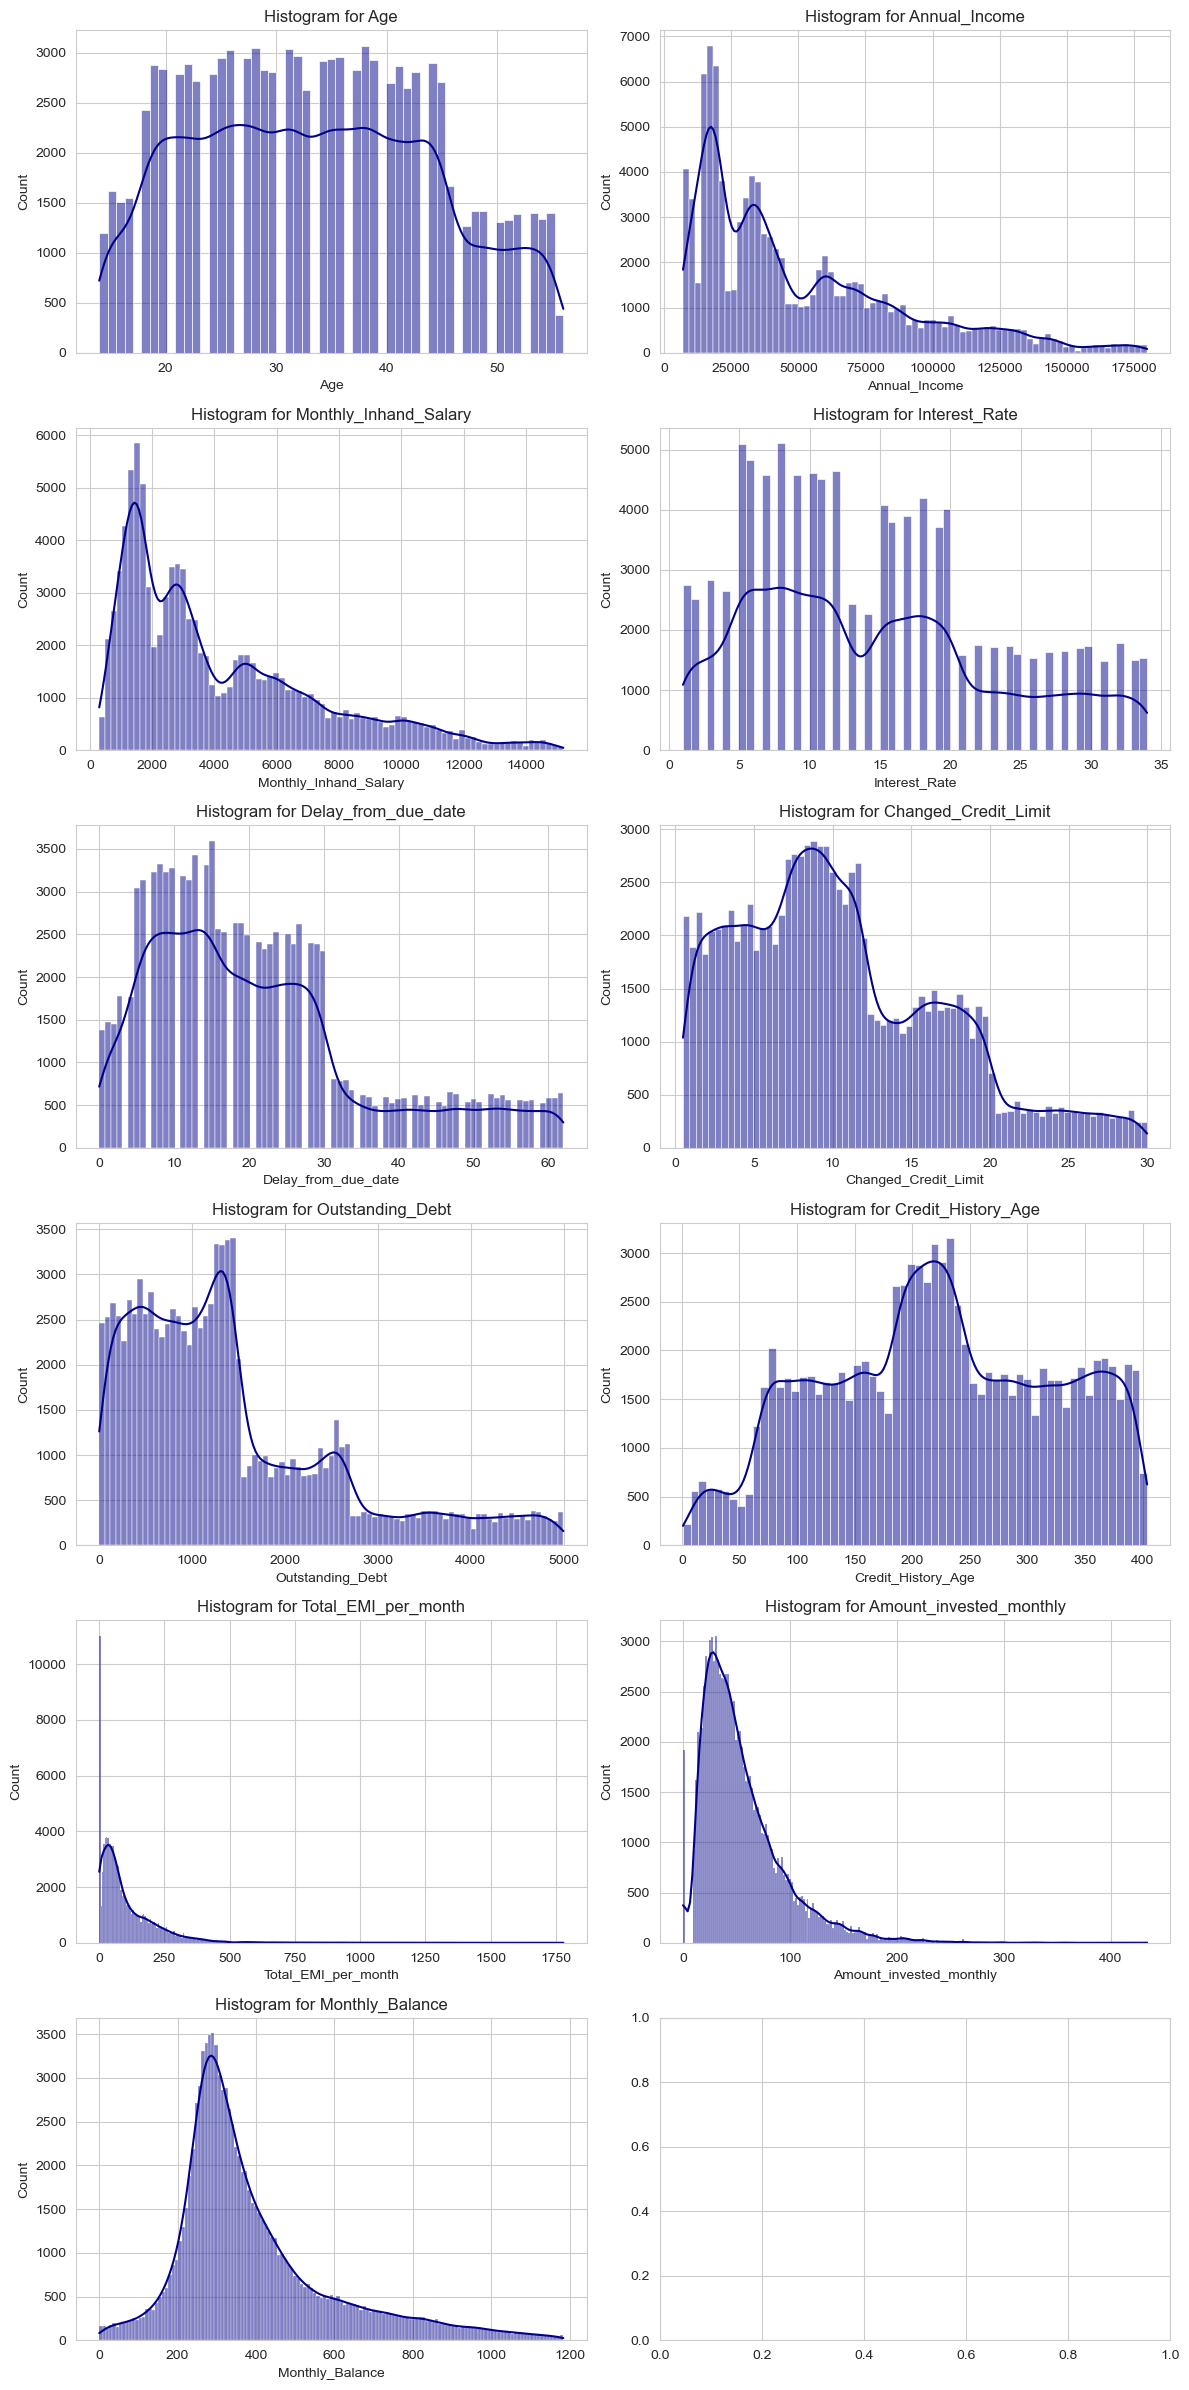

In [51]:
numerical_variable_list = ['Age','Annual_Income','Monthly_Inhand_Salary','Interest_Rate','Delay_from_due_date','Changed_Credit_Limit','Outstanding_Debt','Credit_History_Age','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']
#'Num_Bank_Accounts','Num_Credit_Card','Num_of_Loan','Num_of_Delayed_Payment','Num_Credit_Inquiries','Credit_Utilization_Ratio',
plot_multiple_histograms(updated_data, numerical_variable_list)

In [80]:
def plot_multiple_grouped_bar_plots(original_df, categorical_variable, variables_for_grouping):
    sns.set_style('whitegrid')
    
        # Select relevant columns from the original DataFrame
    selected_df = original_df[[categorical_variable] + variables_for_grouping]

    # Convert relevant columns to numeric
    selected_df[variables_for_grouping] = selected_df[variables_for_grouping].apply(pd.to_numeric, errors='coerce')

    # Drop rows with missing values
    selected_df = selected_df.dropna(subset=variables_for_grouping)

    # Group data by the categorical variable
    grouped_df = selected_df.groupby(categorical_variable).mean()
    
    # Set up the number of subplots based on the number of variables
    num_variables = len(variables_for_grouping)
    
    # Create subplots
    fig, axes = plt.subplots(1, num_variables, figsize=(5 * num_variables, 4))
    
    # Loop through each variable and create a grouped bar plot
    for i, variable in enumerate(variables_for_grouping):
        sns.barplot(x=grouped_df.index, y=variable, data=grouped_df, ax=axes[i])
        axes[i].set_title(f'Grouped Bar Plot for {variable} by {categorical_variable}')
        axes[i].set_xlabel(categorical_variable)
        axes[i].set_ylabel(variable)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

In [82]:
numerical_variables = ['Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Loan']

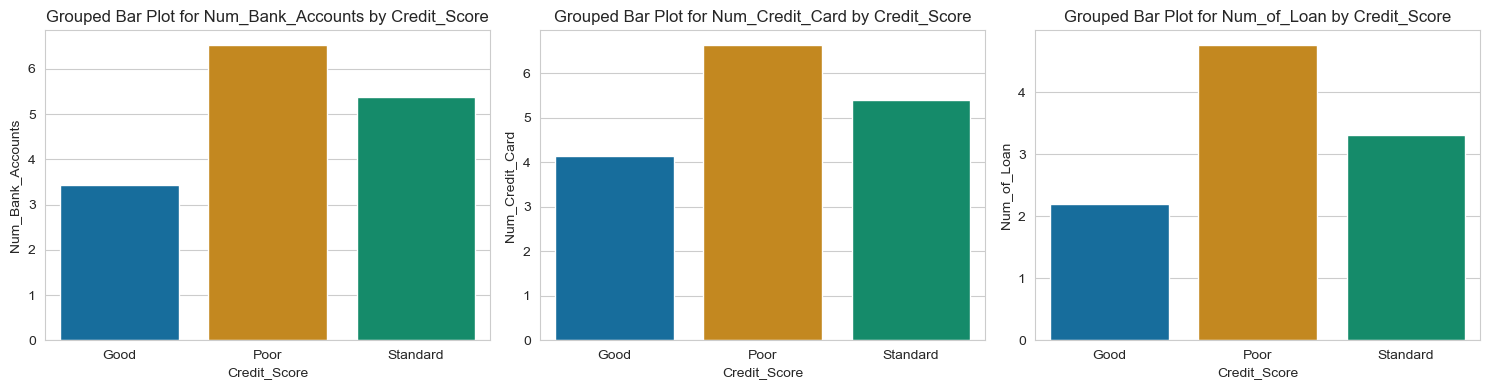

In [81]:
plot_multiple_grouped_bar_plots(updated_data, 'Credit_Score', numerical_variables)

#### Correlation

In [85]:
all_numerical_variables = numerical_variable_list + numerical_variables
selected_cor = updated_data[all_numerical_variables]

correlation = selected_cor.corr()

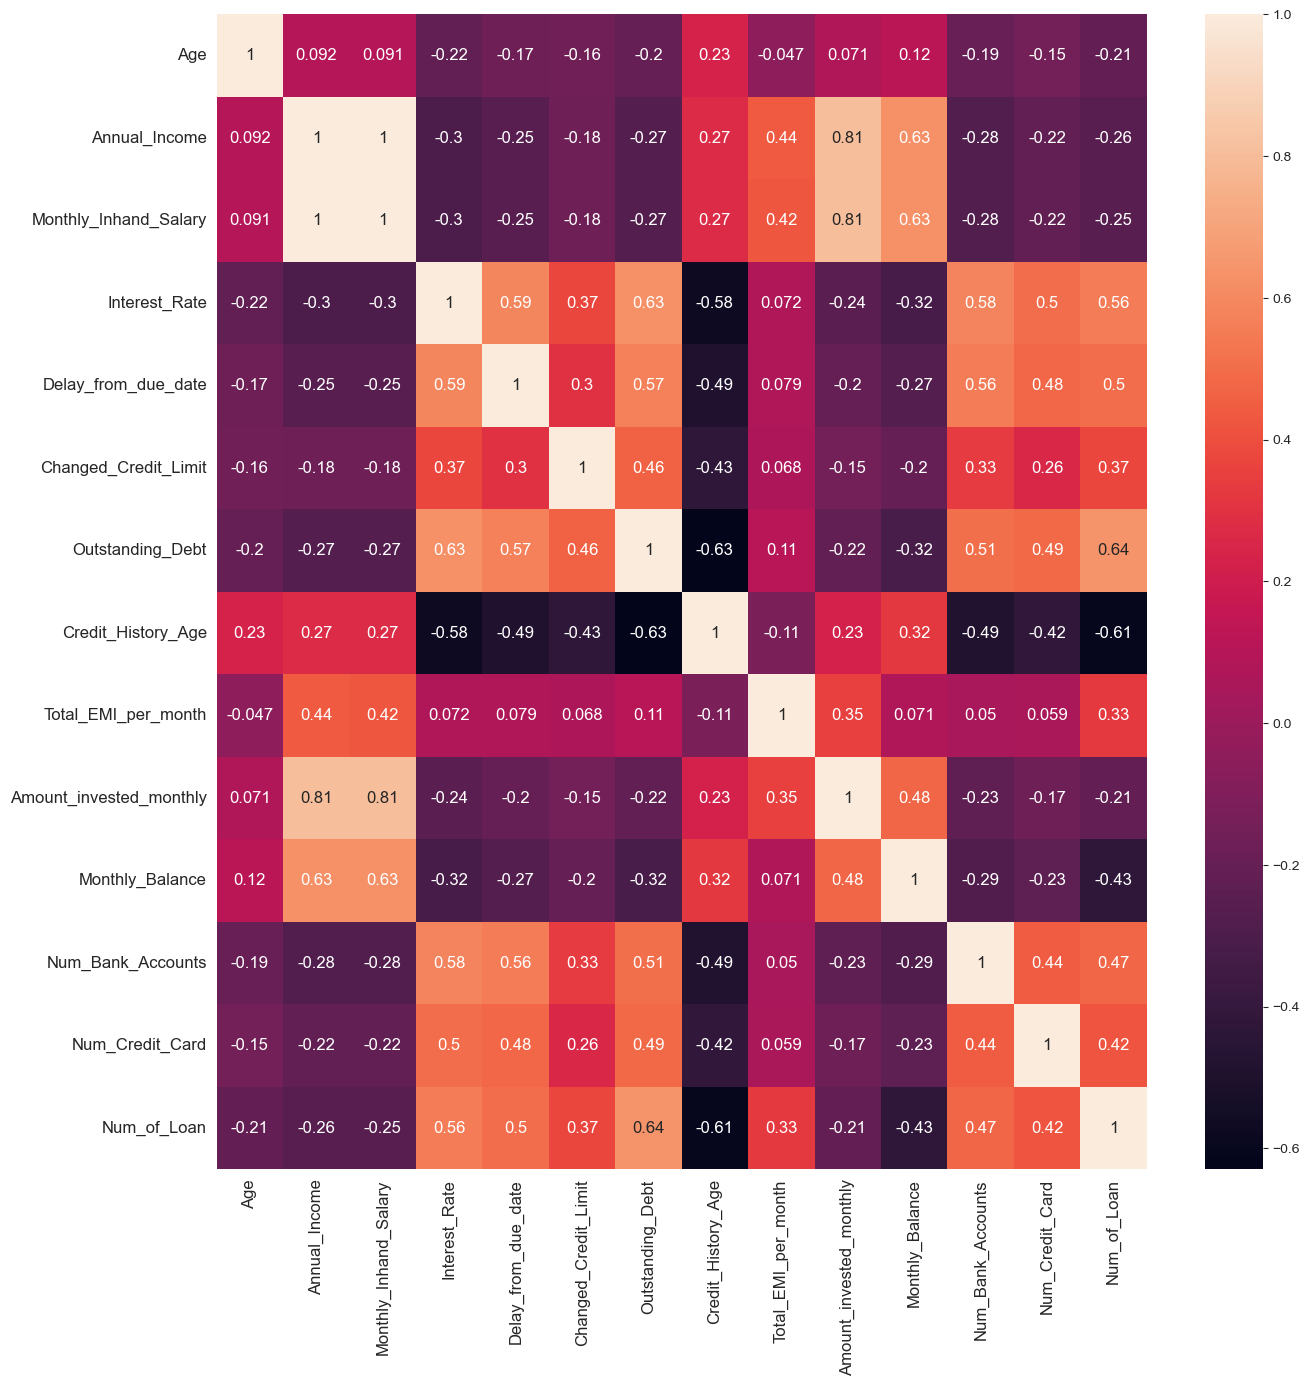

In [86]:
# Plot correlation
plt.figure(figsize=(15, 15))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 12}
)
# Axis ticks size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Notes:**
* `Annual_Income` is highly positively correlated with `Monthly_Inhand_Salary`, `Amount_invested_monthly` and moderately correlated with `Monthly_Balance`. Which makes sense these are dependent on the annual salary. So we can drop all correlated variables and use only `Annual_Income`.
* `Outstanding_Debt` is moderately negatively correlated with `Credit_History_Age`and `Num_of_Loan`. However, these correlations are not strong enough to drop the variables.

##### Transforming Categorical Data for modeling

In [87]:
def transform_categorical_columns(data, column_names):
    for col in column_names:
        # Transform into categorical type
        data[col] = data[col].astype('category')
        
        # Display the number of categories within this column
        print(f"Categories in {col}:")
        print(data[col].value_counts())
        
        # One-hot encoding using get_dummies
        data = pd.get_dummies(data, columns=[col], prefix=col)
    
    return data



In [88]:
columns_to_transform = ['Occupation','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour']
data_for_models = transform_categorical_columns(updated_data, columns_to_transform)

# Display the updated DataFrame
data_for_models

Categories in Occupation:
Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Accountant       6744
Scientist        6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: count, dtype: int64
Categories in Credit_Mix:
Credit_Mix
Standard    45848
Good        30384
Bad         23768
Name: count, dtype: int64
Categories in Payment_of_Min_Amount:
Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64
Categories in Payment_Behaviour:
Payment_Behaviour
Low_spent_Small_value_payments      28580
High_spent_Medium_value_payments    18988
Low_spent_Medium_value_payments     14962
High_spent_Large_value_payments     14639
High_spent_Small_value_payments     12043
Low_spent_Large_value_payments      10788
Name: count, dtype: int64


,ID,Customer_ID,Month,Name,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,student loan,auto loan,credit-builder loan,mortgage loan,No Data,home equity loan,payday loan,debt consolidation loan,personal loan,not specified,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,26.822620,265.0,49.574949,21.465380,312.494089,Good,0,1,1,0,0,1,0,0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,809.98,31.944960,266.0,49.574949,21.465380,284.629162,Good,0,1,1,0,0,1,0,0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,28.609352,267.0,49.574949,21.465380,331.209863,Good,0,1,1,0,0,1,0,0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,809.98,31.377862,268.0,49.574949,21.465380,223.451310,Good,0,1,1,0,0,1,0,0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,809.98,24.797347,269.0,49.574949,21.465380,341.489231,Good,0,1,1,0,0,1,0,0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,11.50,3.0,502.38,34.663572,378.0,35.104023,24.028477,479.866228,Poor,1,1,0,0,0,0,0,0,0,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False
99996,155626,37932,5,Nicks,25.0,78735990.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,11.50,3.0,502.38,40.565631,379.0,35.104023,24.028477,496.651610,Poor,1,1,0,0,0,0,0,0,0,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False
99997,155627,37932,6,Nicks,25.0,78735990.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0,11.50,3.0,502.38,41.255522,380.0,35.104023,24.028477,516.809083,Poor,1,1,0,0,0,0,

In [89]:
def replace_1_0_with_true_false(data, variable_names):
    for variable in variable_names:
        data[variable] = data[variable].replace({1: True, 0: False})
    
    return data

In [91]:
type_of_loan_list = ['student loan','auto loan','credit-builder loan','mortgage loan','No Data','home equity loan','payday loan','debt consolidation loan','personal loan','not specified']
data_for_models_new = replace_1_0_with_true_false (data_for_models,type_of_loan_list)

In [92]:
data_for_models_new

,ID,Customer_ID,Month,Name,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,student loan,auto loan,credit-builder loan,mortgage loan,No Data,home equity loan,payday loan,debt consolidation loan,personal loan,not specified,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,26.822620,265.0,49.574949,21.465380,312.494089,Good,False,True,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,809.98,31.944960,266.0,49.574949,21.465380,284.629162,Good,False,True,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,28.609352,267.0,49.574949,21.465380,331.209863,Good,False,True,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,809.98,31.377862,268.0,49.574949,21.465380,223.451310,Good,False,True,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,809.98,24.797347,269.0,49.574949,21.465380,341.489231,Good,False,True,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,11.50,3.0,502.38,34.663572,378.0,35.104023,24.028477,479.866228,Poor,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False
99996,155626,37932,5,Nicks,25.0,78735990.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,11.50,3.0,502.38,40.565631,379.0,35.104023,24.028477,496.651610,Poor,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,F

In [95]:
final_data = data_for_models_new.drop(columns=['ID','Customer_ID','Month','Name','SSN','Monthly_Inhand_Salary','Amount_invested_monthly','Monthly_Balance'])
final_data

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Credit_Score,student loan,auto loan,credit-builder loan,mortgage loan,No Data,home equity loan,payday loan,debt consolidation loan,personal loan,not specified,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,23.0,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,26.822620,265.0,49.574949,Good,False,True,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False
1,23.0,19114.12,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,809.98,31.944960,266.0,49.574949,Good,False,True,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False
2,23.0,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,28.609352,267.0,49.574949,Good,False,True,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False
3,23.0,19114.12,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,809.98,31.377862,268.0,49.574949,Good,False,True,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True
4,23.0,19114.12,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,809.98,24.797347,269.0,49.574949,Good,False,True,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,39628.99,4.0,6.0,7.0,2.0,23.0,7.0,11.50,3.0,502.38,34.663572,378.0,35.104023,Poor,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False
99996,25.0,39628.99,4.0,6.0,7.0,2.0,18.0,7.0,11.50,3.0,502.38,40.565631,379.0,35.104023,Poor,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False
99997,25.0,39628.99,4.0,6.0,7.0,2.0,27.0,6.0,11.50,3.0,502.38,41.255522,380.0,35.104023,Poor,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False
99998,25.0,39628.99,4.0,6.0,7.0,2.0,20.0,6.0,11.50,3.0,502.38,33.638208,381.0,35.104023,Standard,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,

## Predictive models

### Decision trees

In [96]:
# Make a copy of our data
model_df = final_data.copy()

model_df.to_csv('model_df.csv')

# Separate target variable from independent variables
y = model_df['Credit_Score']
X = model_df.drop(columns=['Credit_Score'])
print(X.shape)
print(y.shape)

(100000, 51)
(100000,)


In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(75000, 51)
(75000,)
(25000, 51)
(25000,)


In [98]:
dt = DT()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [99]:
dt.score(X_train, y_train), dt.score(X_test, y_test)

(1.0, 0.74424)

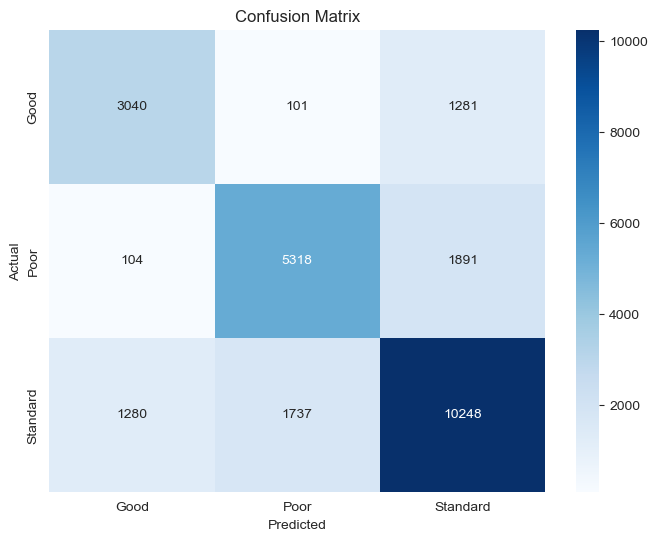

In [104]:
predictions = dt.predict(X_test)
conf_matrix = metrics.confusion_matrix(y_test, predictions)

class_names = np.unique(y_test)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [106]:
accuracy = metrics.accuracy_score(y_test, predictions)
precision = metrics.precision_score(y_test, predictions, average='macro')
recall = metrics.recall_score(y_test, predictions, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.74424
Precision: 0.7313166343931004
Recall: 0.7290764131001896


##### Feature importance

In [109]:
feature_importances_dt = pd.DataFrame({
    'features': X_train.columns,
    'importance': dt.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()


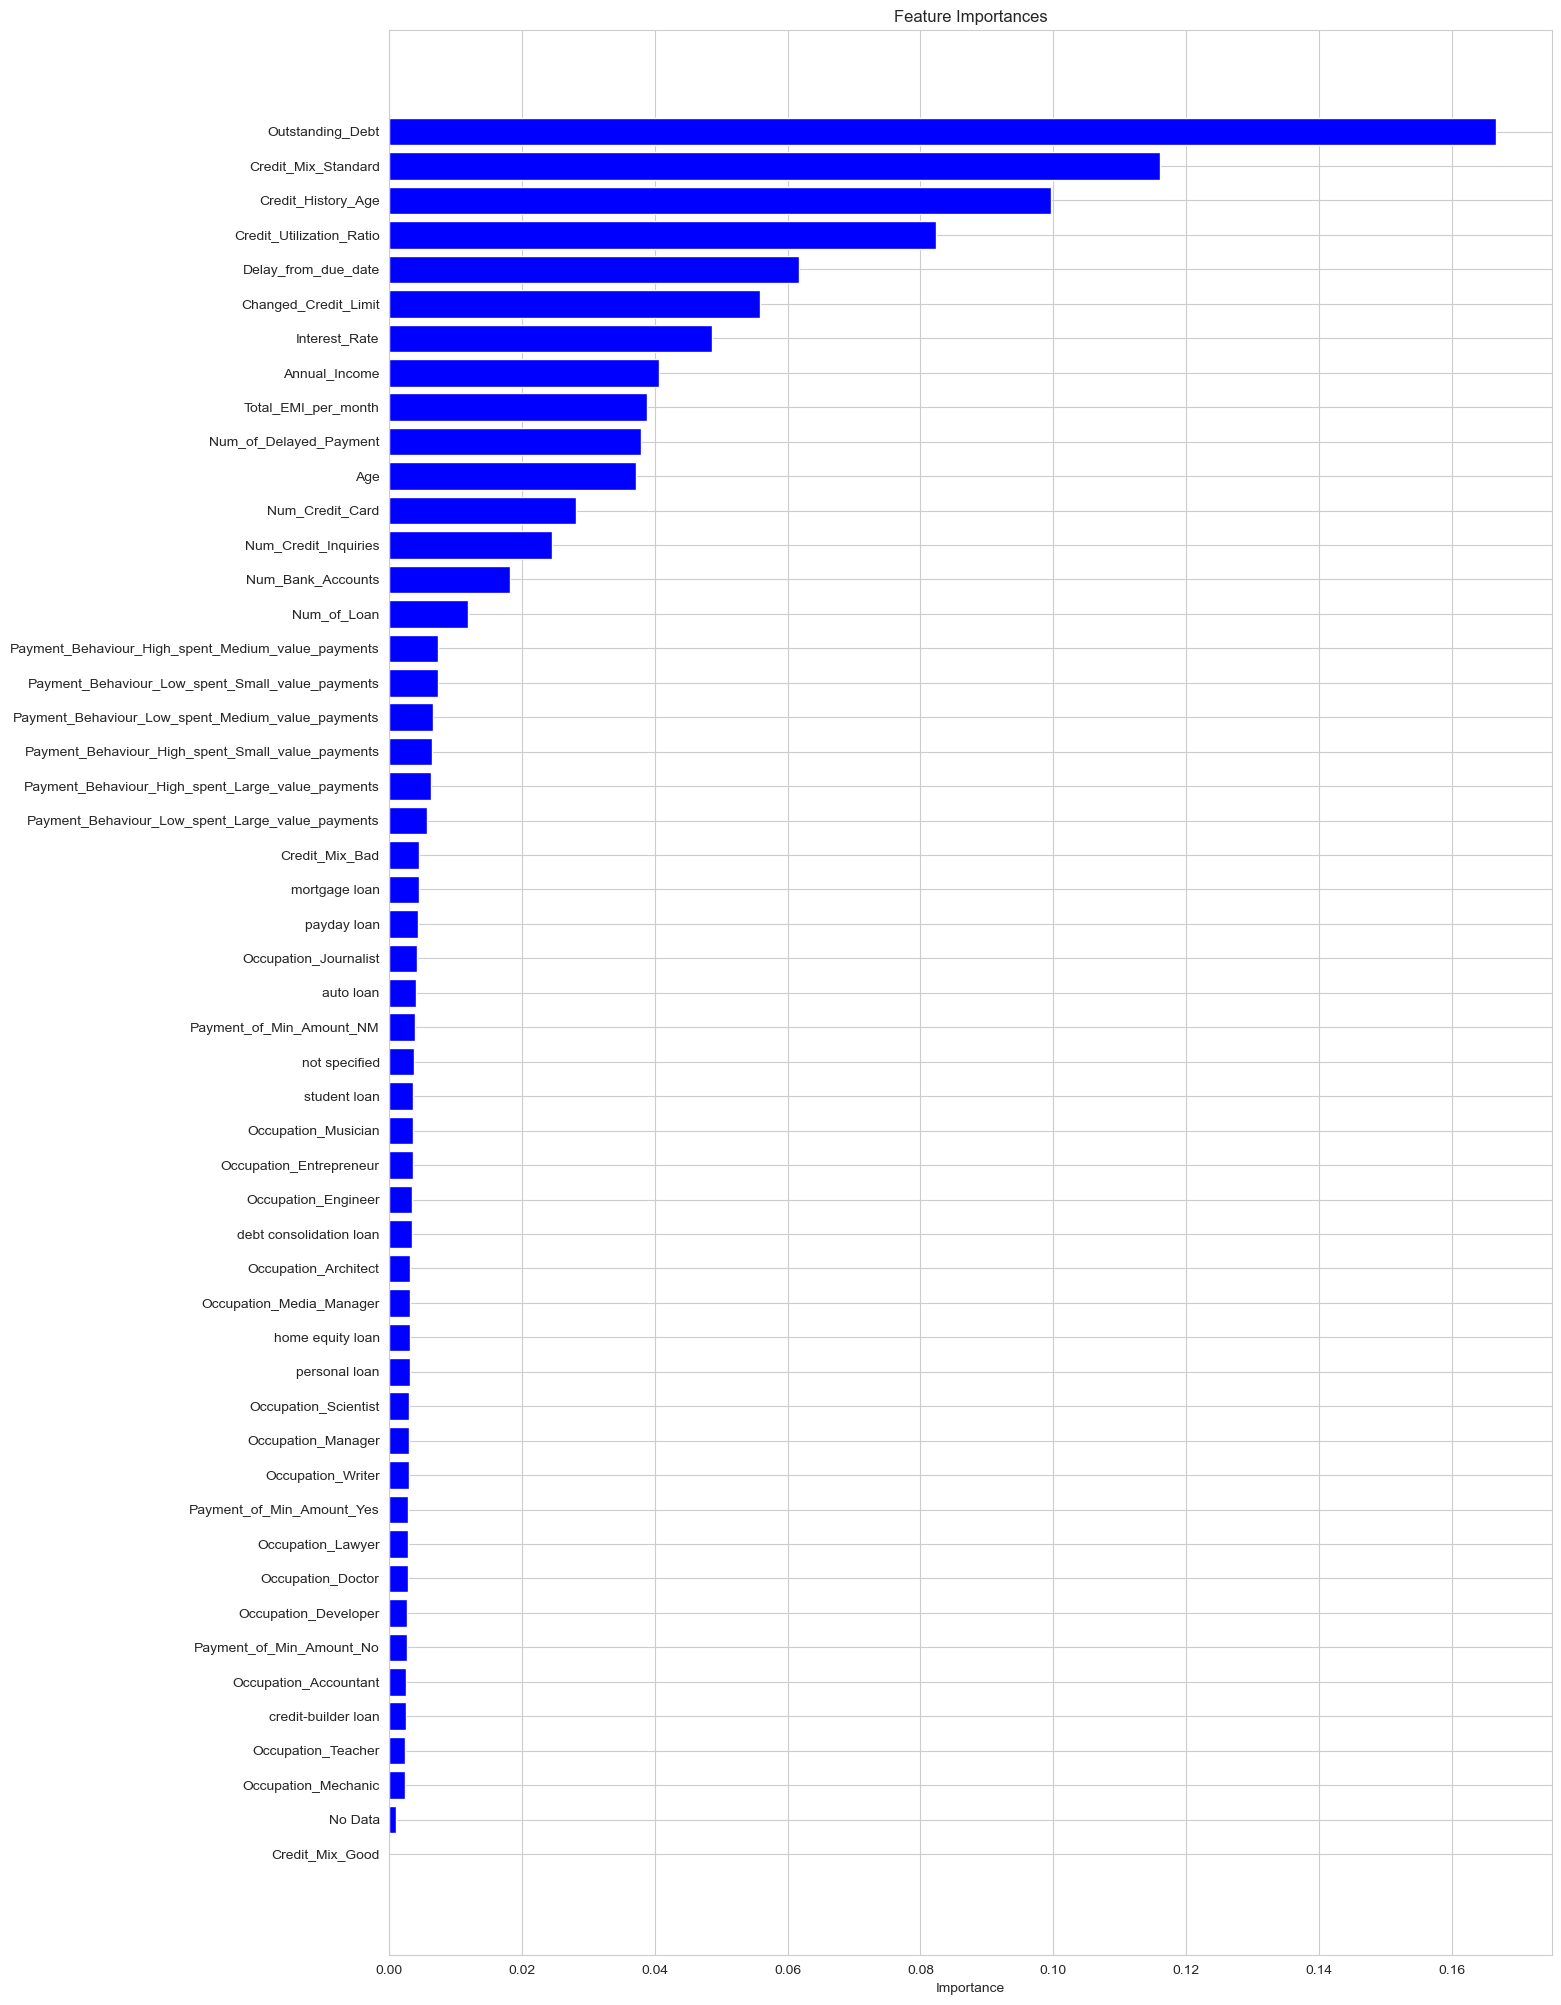

In [110]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances_dt)), feature_importances_dt['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances_dt)), feature_importances_dt['features'])
plt.xlabel('Importance')
plt.show()

In [120]:
feature_importances_dt

,index,features,importance
0,40,Credit_Mix_Good,0.000000
1,18,No Data,0.001022
2,33,Occupation_Mechanic,0.002301
3,37,Occupation_Teacher,0.002385
4,16,credit-builder loan,0.002504
5,24,Occupation_Accountant,0.002507
6,43,Payment_of_Min_Amount_No,0.002589
7,26,Occupation_Developer,0.002636
8,27,Occupation_Doctor,0.002749
9,31,Occupation_Lawyer,0.002778


#### Insights

**Confusion Matrix Analysis for Creditworthiness:**

The confusion matrix provides a snapshot of the model's performance in predicting creditworthiness across three classes: "Good," "Poor," and "Standard."

- **Good (True Positive):** 3440 instances were correctly classified as "Good" creditworthiness.
- **Poor (True Positive):** 5318 instances were correctly classified as "Poor" creditworthiness.
- **Standard (True Positive):** 10278 instances were correctly classified as "Standard" creditworthiness.

The confusion matrix indicates that the model is relatively effective in predicting "Poor" and "Standard" creditworthiness. However, there is room for improvement in predicting "Good" creditworthiness, as there were instances incorrectly classified as "Poor" and "Standard."

**Model Evaluation Metrics:**

- **Accuracy:** The overall accuracy of the model is 74.42%, representing the proportion of correctly predicted instances across all classes.

- **Precision:** Precision measures the accuracy of positive predictions. The model achieved a precision of approximately 73.13%, indicating a relatively high accuracy in identifying true positive instances.

- **Recall:** Recall, also known as sensitivity or true positive rate, represents the proportion of actual positive instances correctly predicted by the model. The recall is approximately 72.91%, suggesting that the model captures a significant portion of the true positive instances.

**Feature Importance:**

The feature importance analysis presents the bottom 15 features ranked by importance, as determined by the model. These features, play a crucial role in influencing the model's predictions. Notable findings include:

1. **Outstanding Debt:** The outstanding debt is identified as a highly important factor in determining creditworthiness.

2. **Credit Mix (Standard):** The mix of standard credit is recognized as a significant predictor in the model.

3. **Credit History Age:** The age of credit history is an essential consideration for evaluating creditworthiness.

4. **Credit Utilization Ratio:** The ratio of credit utilization emerges as an influential factor in the model's decision-making process.

5. **Delay from Due Date:** The delay from the due date is a relevant feature in predicting creditworthiness.

6. **Changed Credit Limit:** Changes in credit limits play a role in influencing the model's predictions.

7. **Interest Rate:** The interest rate is identified as an important factor affecting creditworthiness.

8. **Annual Income:** The annual income of individuals is considered a key feature in predicting creditworthiness.

9. **Total EMI per Month:** The total Equated Monthly Installment (EMI) per month is recognized as an influential factor.

10. **Num of Delayed Payment:** The number of delayed payments is considered in assessing creditworthiness.

11. **Age:** The age of individuals is identified as a relevant factor in the model.

12. **Num of Credit Card:** The number of credit cards is considered when predicting creditworthiness.

13. **Num Credit Inquiries:** The number of credit inquiries is an influential factor in the model's decision-making.

14. **Num Bank Accounts:** The number of bank accounts is considered as a predictor in evaluating creditworthiness.

15. **Num of Loan:** The number of loans is recognized as an important feature affecting creditworthiness.

**Future aspects**

1. **Further Analysis:** Conduct further analysis and exploration on these features to understand their specific contributions to creditworthiness predictions.

2. **Interpretability:** Communicate to stakeholders that even features appearing lower in the list contribute meaningfully to the model's decision-making process.

### Random Forest Classifier

In [114]:
model_rf = RandomForestClassifier(
    n_estimators=1000
)
model_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

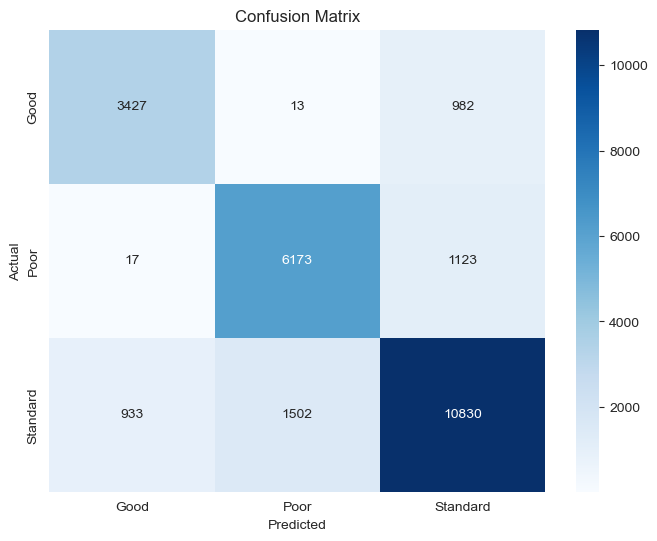

In [115]:
predictions_rf = model_rf.predict(X_test)
conf_matrix = metrics.confusion_matrix(y_test, predictions_rf)

class_names = np.unique(y_test)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [116]:
accuracy_rf = metrics.accuracy_score(y_test, predictions_rf)
precision_rf = metrics.precision_score(y_test, predictions_rf, average='macro')
recall_rf = metrics.recall_score(y_test, predictions_rf, average='macro')

print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)

Accuracy: 0.8172
Precision: 0.8077197494269125
Recall: 0.8118453804439425


#### Feature Importance random forest model

In [117]:
feature_importances_rf = pd.DataFrame({
    'features': X_train.columns,
    'importance': dt.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()


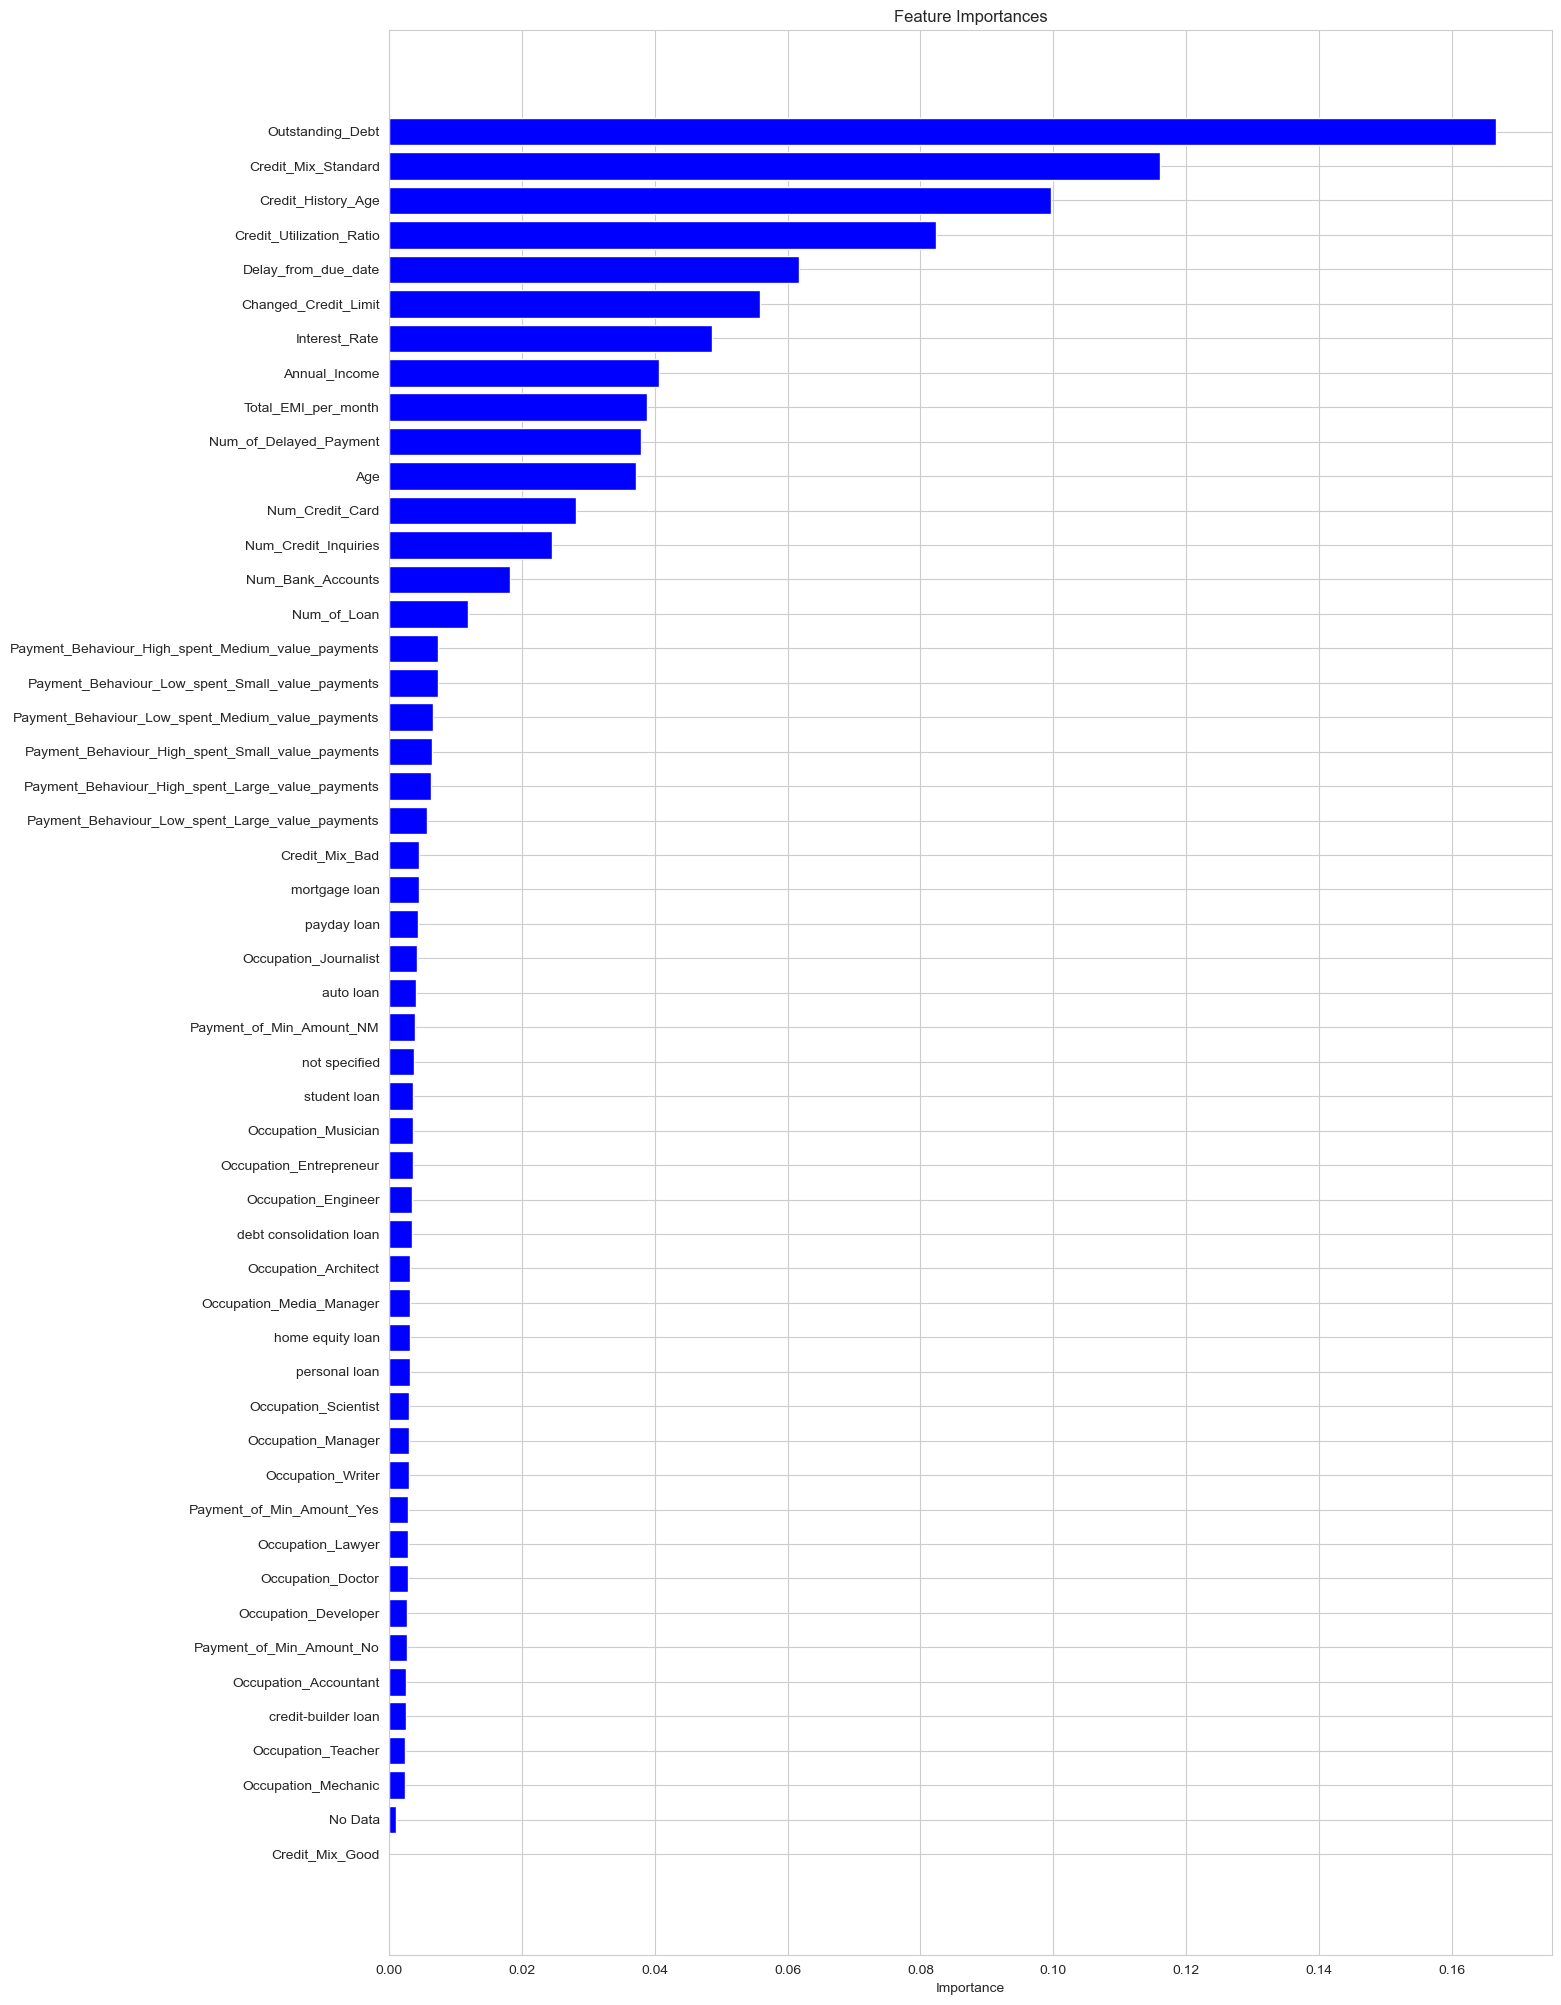

In [118]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances_rf)), feature_importances_rf['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances_rf)), feature_importances_rf['features'])
plt.xlabel('Importance')
plt.show()

#### Insights

**Confusion Matrix Analysis for Creditworthiness:**

The confusion matrix provides a snapshot of the model's performance in predicting creditworthiness across three classes: "Good," "Poor," and "Standard."

- **Good (True Positive):** 3427 instances were correctly classified as "Good" creditworthiness.
- **Poor (True Positive):** 6173 instances were correctly classified as "Poor" creditworthiness.
- **Standard (True Positive):** 10830 instances were correctly classified as "Standard" creditworthiness.

The confusion matrix indicates that the model is relatively effective in predicting "Poor" and "Standard" creditworthiness. However, there is room for improvement in predicting "Good" creditworthiness, as there were instances incorrectly classified as "Poor" and "Standard."

**Model Evaluation Metrics:**

- **Accuracy:** The overall accuracy of the model is 81.72%, representing the proportion of correctly predicted instances across all classes.

- **Precision:** Precision measures the accuracy of positive predictions. The model achieved a precision of approximately 80.77%, indicating a relatively high accuracy in identifying true positive instances.

- **Recall:** Recall, also known as sensitivity or true positive rate, represents the proportion of actual positive instances correctly predicted by the model. The recall is approximately 81.18%, suggesting that the model captures a significant portion of the true positive instances.


## Overall Conclusions


- Common Important Features: The random forest model, like the decision tree model, identifies similar important features for predicting creditworthiness. These features play a crucial role in both models, contributing to their predictive accuracy.
- Features such as outstanding debt, credit mix, credit history age, and others retain their significance across both models.
- The random forest model outperforms the decision tree model across all performance metrics, achieving higher accuracy, precision, and recall.
- The random forest model's accuracy of 81.72% indicates an improvement compared to the decision tree's accuracy of 74.42%.
- Random forest's ensemble approach, aggregating predictions from multiple decision trees, contributes to better generalization and robustness.
- The random forest model's precision and recall demonstrate a balanced improvement, indicating a reduced tendency for both false positives and false negatives.
- The improved model performance, especially in precision and recall, may lead to more accurate creditworthiness assessments.
- Organizations can make better-informed decisions, potentially reducing the risks associated with false positives and false negatives.
- Continuous monitoring and evaluation of both models are essential to ensure their performance aligns with evolving creditworthiness patterns.
- Regular updates to the models may be necessary based on changing economic conditions and credit industry dynamics.

In conclusion, while both models share common important features, the random forest model showcases superior predictive performance, making it a preferable choice for accurate creditworthiness assessments in this context. The ensemble nature of the random forest contributes to improved generalization and a reduction in the risks associated with false predictions.